# Image classification using Convolution Neural Network

## 1. Importing library

In [3]:
!pip install tensorflow

In [25]:
import tensorflow as tf

In [26]:
tf.__version__


'2.8.0'

In [4]:
!pip install keras

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Download images from Google

In [48]:
!pip install simple_image_download
from simple_image_download import simple_image_download as simp

In [51]:
response = simp.simple_image_download
response().download(keywords="Cat", limit=100)

AttributeError: module 'simple_image_download.simple_image_download' has no attribute 'simple_image_download'

## Image Augmentation for Tree

In [3]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [8]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [36]:
img = load_img('/Users/bobby/Desktop/Bellarmine/Drones/TrainingTree/Tree/Tree19.png')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

In [37]:
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/Users/bobby/Desktop/Bellarmine/Drones/TrainingTree/Tree', save_prefix='tree', save_format='jpeg'):
    i += 1
    if i > 50:
        break  # otherwise the generator would loop indefinitely

## Image Augmentation for NoTree

In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [2]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [18]:
img = load_img('/Users/bobby/Desktop/Bellarmine/Drones/TrainingTree/NoTree/simple_images/Cat_2d0.jpeg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

In [19]:
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/Users/bobby/Desktop/Bellarmine/Drones/TrainingTree/NoTree/simple_images', save_prefix='notree', save_format='jpeg'):
    i += 1
    if i > 50:
        break  # otherwise the generator would loop indefinitely

## 2. Image Preprocessing

### Training set data augmentation
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [29]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
        '/Users/bobby/Desktop/Bellarmine/Drones/TrainingTree',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2309 images belonging to 2 classes.


### Test set preprocessing

In [30]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        '/Users/bobby/Desktop/Bellarmine/Drones/TestTree',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 878 images belonging to 2 classes.


## 3. Building CNN
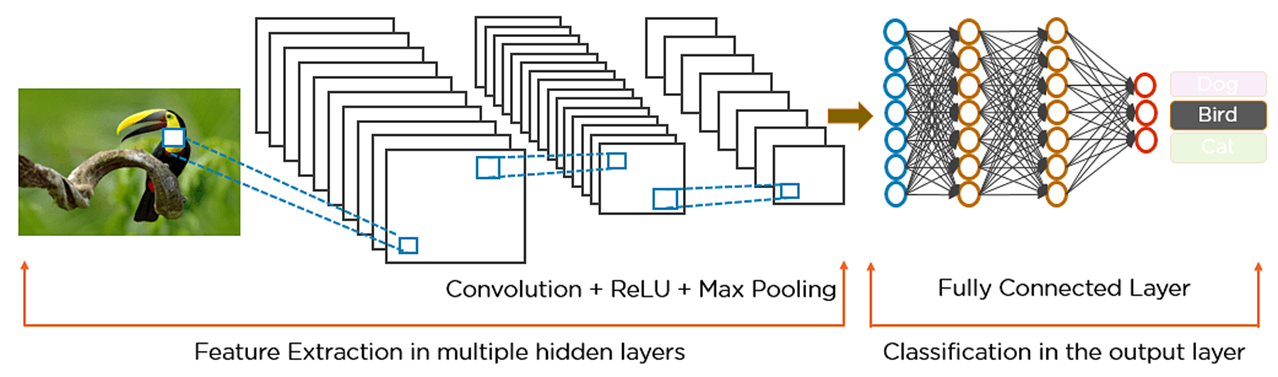
https://www.tensorflow.org/api_docs/python/tf/keras/layers

In [31]:
cnn=tf.keras.models.Sequential()

### Step1: Convolution layer
tf.keras.layers.Conv2D(
    filters, kernel_size, strides=(1, 1), padding='valid',
    data_format=None, dilation_rate=(1, 1), groups=1, activation=None,
    use_bias=True, kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None, **kwargs
)
* When using this layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers or None, does not include the sample axis), 
* e.g. input_shape=[128, 128, 3] for 128x128 RGB pictures in data_format="channels_last". 
* You can use None when a dimension has variable size.

In [32]:
cnn.add(tf.keras.layers.Conv2D(filters=32, 
                               kernel_size=3, 
                               activation='relu',
                              input_shape=[64,64,3]))

### Step2: Maxpooling
tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), strides=None, padding='valid', data_format=None,
    **kwargs
)

In [33]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step3: Adding 2nd convolution layer
Remove input_shape as it is only for first convolution layer where the input fidded

In [34]:
cnn.add(tf.keras.layers.Conv2D(filters=32, 
                               kernel_size=3, 
                               activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### Step3a: You can add mode conv and max pooling layers..

### Step4: Flattening layer
tf.keras.layers.Flatten(
    data_format=None, **kwargs
)

In [35]:
cnn.add(tf.keras.layers.Flatten())

### Step5: Fully connected layer
tf.keras.layers.Dense(
    units, activation=None, use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None, **kwargs
)
* units= number of active neurons you want to add in your model

In [36]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step6: Output layer
* Binary classification `sigmoid` activation function
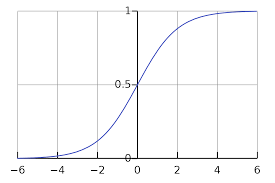
* Multiclass classification `softmax` activation function

In [37]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## 4. Training CNN on training set and evaluation in the Test set
https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c

In [38]:
cnn.compile(optimizer='adam', 
            loss='binary_crossentropy', 
            metrics=['accuracy'])

In [39]:
history=cnn.fit(x=training_set, validation_data=test_set, epochs=25)

Epoch 1/25
 6/73 [=>............................] - ETA: 55s - loss: 0.6758 - accuracy: 0.5312 

/Users/bobby/Desktop/Bellarmine/anaconda3/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


73/73 [==============================] - 100s 1s/step - loss: 0.4445 - accuracy: 0.7921 - val_loss: 1.0487 - val_accuracy: 0.6355
Epoch 2/25
73/73 [==============================] - 94s 1s/step - loss: 0.2941 - accuracy: 0.8844 - val_loss: 0.8444 - val_accuracy: 0.6731
Epoch 3/25
73/73 [==============================] - 93s 1s/step - loss: 0.2125 - accuracy: 0.9160 - val_loss: 0.8698 - val_accuracy: 0.7050
Epoch 4/25
73/73 [==============================] - 92s 1s/step - loss: 0.1895 - accuracy: 0.9264 - val_loss: 0.8647 - val_accuracy: 0.6959
Epoch 5/25
73/73 [==============================] - 84s 1s/step - loss: 0.1571 - accuracy: 0.9411 - val_loss: 0.4423 - val_accuracy: 0.8144
Epoch 6/25
73/73 [==============================] - 82s 1s/step - loss: 0.1410 - accuracy: 0.9485 - val_loss: 0.3332 - val_accuracy: 0.8462
Epoch 7/25
73/73 [==============================] - 82s 1s/step - loss: 0.1435 - accuracy: 0.9472 - val_loss: 0.4934 - val_accuracy: 0.7927
Epoch 8/25
73/73 [============

Text(0.5, 1.0, 'Training vs Validation Loss')

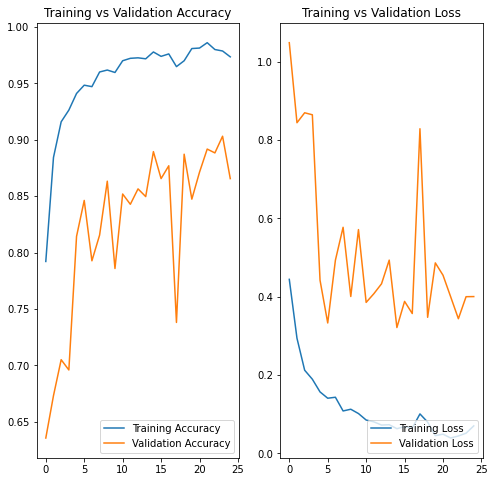

In [40]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_range=range(25)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training vs Validation Accuracy")
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='lower right')
plt.title("Training vs Validation Loss")

## 5. Prediction

In [41]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [111]:
test_image = image.load_img('/Users/bobby/Desktop/Bellarmine/Drones/TreePrediction/NoTree8.jpeg', target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image, axis=0)

result=cnn.predict(test_image/255.0)

if result[0][0]>.6:
    prediction='Tree'
else:
    prediction='NoTree'
print(prediction)

NoTree


## Saving your Model

In [114]:
cnn.save('/Users/bobby/Desktop/Bellarmine/Drones/TreeModel.h5')

## Loading back your model

In [21]:
from tensorflow import keras
model = keras.models.load_model('/Users/bobby/Desktop/Bellarmine/Drones/TreeModel.h5')


In [113]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [112]:
result=model.predict(test_image/255.0)

if result[0][0]>.6:
    prediction='Tree'
else:
    prediction='No Tree'
print(prediction)

No Tree


## Model Accuracy Using Confusion Matrix

### True Positive (TP) — model correctly predicts the positive class (prediction and actual both are positive).
### True Negative (TN) — model correctly predicts the negative class (prediction and actual both are negative).
### False Positive (FP) — model gives the wrong prediction of the negative class (predicted-positive, actual-negative)
### False Negative (FN) — model wrongly predicts the positive class (predicted-negative, actual-positive). 

In [44]:
!pip install -U scikit-learn
!pip install seaborn
!pip install pandas
!pip install matplotlib

     |████████████████████████████████| 8.0 MB 172 kB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [77]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
import pandas as pd
import seaborn as sns

In [78]:
# Source code credit for this function: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

In [104]:
truth = ["Tree", "Tree", "Tree", "Tree", "Tree", "NoTree", "NoTree", "NoTree", "NoTree", "NoTree"]
prediction = ["Tree","Tree","Tree","Tree","Tree", "NoTree", "NoTree","Tree","NoTree", "NoTree"]

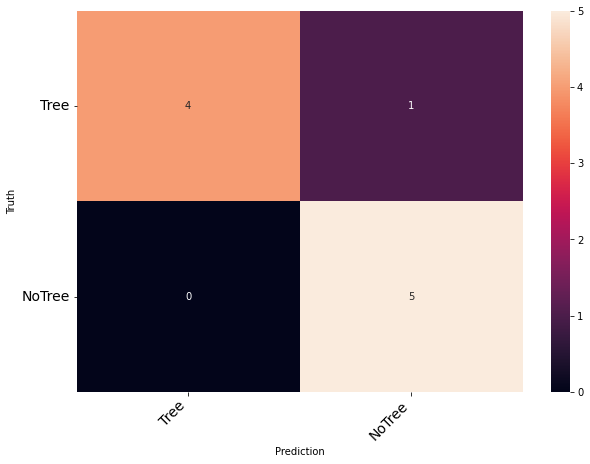

In [105]:
cm = confusion_matrix(truth,prediction)
print_confusion_matrix(cm,["Tree", "NoTree"])

## For Tree class

In [106]:
tp=4 # Actual Tree predicted Tree
tn=2 # Actual noTree predicted noTree
fp=3 # Actual noTree predicted Tree
fn=1 # Actual Tree predicted noTree

### What does precision mean?
Precision should ideally be 1 (high) for a good classifier. Precision becomes 1 only when the numerator and denominator are equal i.e TP = TP +FP, this also means FP is zero. As FP increases the value of denominator becomes greater than the numerator and precision value decreases (which we don’t want).

### Recall:
Recall is also known as sensitivity or true positive rate and is defined as follows:
Recall should ideally be 1 (high) for a good classifier

### F1-Score:
F1-score is a metric which takes into account both precision and recall and is defined as follows
F1 Score becomes 1 only when precision and recall are both 1. F1 score becomes high only when both precision and recall are high. F1 score is the harmonic mean of precision and recall and is a better measure than accuracy.

In [107]:
print(classification_report(truth, prediction))

              precision    recall  f1-score   support

      NoTree       1.00      0.80      0.89         5
        Tree       0.83      1.00      0.91         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10

